In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os. getcwd()

'C:\\Users\\Ramon\\Desktop\\SudokuSolvers\\src\\statistics_data'

In [4]:
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']
sizes = ['4x4', '9x9']
for size in sizes:
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        #print(df)
        print(size + ' ',heuristic + ' mean time: ',df['Time'].mean(), ' branches: ',df['Branches'].mean())
    print('-------------------')
    


4x4  None mean time:  0.0027707149982452  branches:  0.0
4x4  DLCS mean time:  0.002700836896896323  branches:  0.0
4x4  DLISN mean time:  0.0032182950973510312  branches:  0.0
4x4  DLISP mean time:  0.002826662778854349  branches:  0.0
4x4  MOMS mean time:  0.002760466098785382  branches:  0.0
-------------------
9x9  None mean time:  0.6703439130783081  branches:  3.892
9x9  DLCS mean time:  1.1164331886768342  branches:  123.877
9x9  DLISN mean time:  0.9898407735824585  branches:  79.485
9x9  DLISP mean time:  0.6643650755882263  branches:  4.542
9x9  MOMS mean time:  0.6564850664138794  branches:  3.429
-------------------


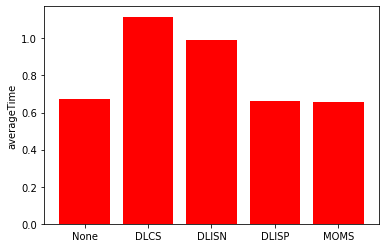

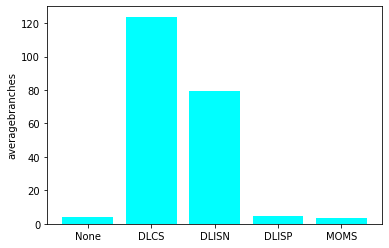

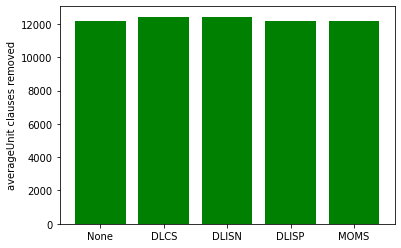

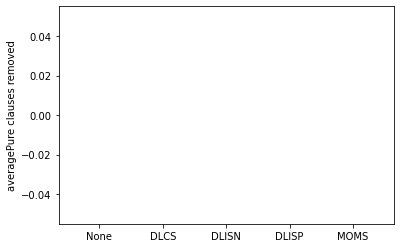

In [6]:
def makebarplots(sudokuSize=9, time=[], branches=[],unitCRemoved=[],pureCRemoved=[],
                   colors = ['red', 'cyan', 'green', 'purple'],
                   elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed'],
                   heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']
                   ):
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        if(sudokuSize == 9):
            df = pd.read_csv('9x9/'+heuristic+'.csv')
        elif(sudokuSize == 4):
            df = pd.read_csv('4x4/'+heuristic+'.csv')
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())
    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        plt.bar(heuristics, element, color=color)
        plt.show()

makebarplots(sudokuSize=9) ## if you call this function from another cell it's broken
                           ## also calling it twice at once breaks it, idk man something with matplotlib

In [7]:
time9=[]
branches9 = []
unitCRemoved9= []
pureCRemoved9= []
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    time9.append(df["Time"].mean())
    branches9.append(df["Branches"].mean())
    unitCRemoved9.append(df["Unit clauses removed"].mean())
    pureCRemoved9.append(df["Pure clauses removed"].mean())

In [8]:
time4=[]
branches4 = []
unitCRemoved4= []
pureCRemoved4= []
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']

for heuristic in heuristics:
    df = pd.read_csv('4x4/'+heuristic+'.csv')
    time4.append(df["Time"].mean())
    branches4.append(df["Branches"].mean())
    unitCRemoved4.append(df["Unit clauses removed"].mean())
    pureCRemoved4.append(df["Pure clauses removed"].mean())

In [9]:
from scipy import stats
stats.ttest_ind(time4, time9, equal_var=False)

Ttest_indResult(statistic=-8.376906232711336, pvalue=0.001110810957609403)

In [10]:
stats.ttest_ind(branches4, branches9)

Ttest_indResult(statistic=-1.7254929385620001, pvalue=0.12271860671491087)

In [11]:
stats.ttest_ind(unitCRemoved4, unitCRemoved9)

Ttest_indResult(statistic=-198.06653781964883, pvalue=4.725092841120794e-16)

In [326]:
stats.ttest_ind(pureCRemoved4, pureCRemoved9)

Ttest_indResult(statistic=nan, pvalue=nan)

['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.6703439130783081, 1.1164331886768342, 0.9898407735824585, 0.6643650755882263, 0.6564850664138794, 1.0937753694057464]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [3.892, 123.877, 79.485, 4.542, 3.429, 8.71]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [12166.522, 12426.335, 12431.753, 12190.224, 12202.332, 12190.384]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0027707149982452, 0.002700836896896323, 0.0032182950973510312, 0.002826662778854349, 0.002760466098785382, 0.00407886314392087]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [452.934, 452.934, 452.934, 452.934, 452.934, 452.934]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


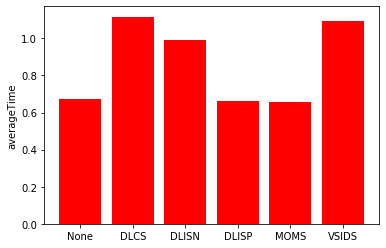

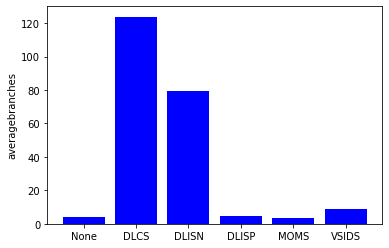

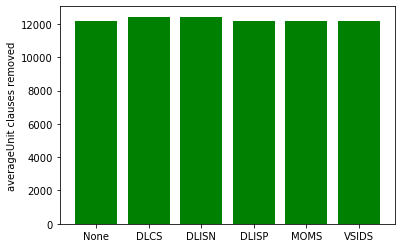

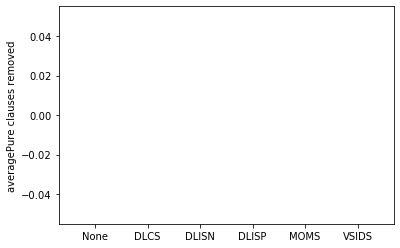

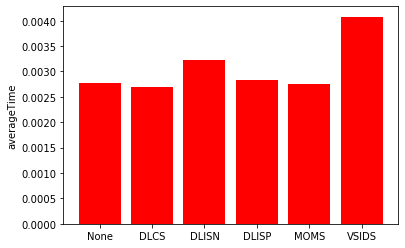

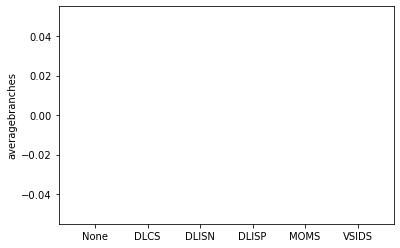

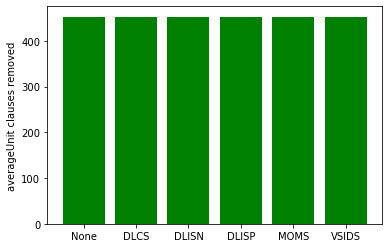

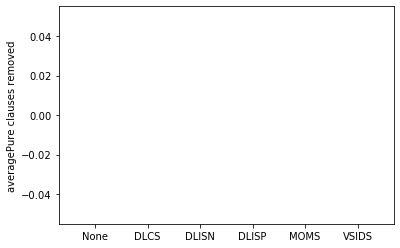

In [327]:
colors = ['red', 'blue', 'green', 'purple']
elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed']
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']


sizes = ['9x9','4x4']
for size in sizes:
    time=[]
    branches=[]
    unitCRemoved=[]
    pureCRemoved=[]
    meme = []
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())

    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        print(heuristics, element)
        plt.bar(heuristics, element, color=color)
    plt.show()

